[Список акций московской биржы](https://www.moex.com/msn/stock-instruments)

Должно получиться примерно 387 тикетов для анализа 

In [48]:
# !pip install matplotlib

In [49]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.max_rows = 50
pd.options.display.max_columns = 70

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
df_instr = pd.read_csv('../data/rates.csv', sep = ';', encoding = 'cp1251', header = 1)
df_instr = df_instr[['SECID','SHORTNAME', 'NAME', 'TYPENAME', 'ISIN','FACEVALUE', 'FACEUNIT', 'PRIMARY_BOARDID', 'EMITENTNAME', 'PRICE']]
print(df_instr.shape[0])
df_instr.head()

3175


,SECID,SHORTNAME,NAME,TYPENAME,ISIN,FACEVALUE,FACEUNIT,PRIMARY_BOARDID,EMITENTNAME,PRICE
0,AAL-RM,AmAirlines,American Airlines Group Inc.,Иностранные акции,US02376R1023,"0,01",USD,FQBR,American Airlines Group Inc.,"1648,77"
1,AAPL-RM,Apple,Apple Inc.,Иностранные акции,US0378331005,1e-05,USD,FQBR,Apple Inc,"9359,5"
2,ABBV-RM,AbbVie,AbbVie Inc.,Иностранные акции,US00287Y1091,"0,01",USD,FQBR,AbbVie Inc.,"8664,1"
3,ABRD,АбрауДюрсо,Абрау-Дюрсо ПАО ао,Акции обыкновенные,RU000A0JS5T7,"1,0",RUB,TQBR,"Публичное акционерное общество ""Абрау – Дюрсо""","196,891"
4,ABT-RM,Abbott,Abbott Laboratories,Иностранные акции,US0028241000,"0,0",USD,FQBR,Abbot Laboratories,"8768,16"


In [4]:
web.DataReader(['ABRD', 'ACKO'], 'moex', start='2021-05-01').head()

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,CLOSEPERIOD,CLOSEVAL,COUPONPERCENT,COUPONVALUE,CURRENCYID,DAILYCAPITALIZATION,DECIMALS,FACEUNIT,FACEVALUE,HIGH,HIGHBID,IRICPICLOSE,ISIN,ISSUESIZE,LASTPRICE,LASTTRADEDATE,LEGALCLOSEPRICE,LEGALOPENPRICE,LISTNAME,LOW,LOWOFFER,MARKETPRICE,MARKETPRICE2,MARKETPRICE3,MARKETPRICE3CUR,MARKETPRICE3TRADESVALUE,MARKETPRICE3TRADESVALUECUR,MONTHLYCAPITALIZATION,MP2VALTRD,MPVALTRD,NUMBID,NUMOFFER,NUMTRADES,OFFER,OFFERDATE,OPEN,OPENPERIOD,OPENVAL,PREV,PREVLEGALCLOSEPRICE,REGNUMBER,SECID,SHORTNAME,TRADINGSESSION,TRENDCLOSE,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-04,201.5,3099660.0,NaN,NaN,TQBR,NaN,NaN,NaN,201.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,201.5,NaN,NaN,200.5,NaN,NaN,201.0,201.0,NaN,3099660.0,NaN,NaN,3099660.0,NaN,NaN,NaN,421.0,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,ABRD,АбрауДюрсо,3.0,NaN,NaN,NaN,NaN,NaN,3099660.0,15410.0,201.0,0.0,NaN,NaN
2021-05-05,NaN,0.0,NaN,NaN,SMAL,NaN,NaN,NaN,199.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,199.5,NaN,NaN,NaN,NaN,NaN,ABRD,АбрауДюрсо,3.0,NaN,NaN,NaN,NaN,NaN,199.5,1.0,201.0,0.0,NaN,NaN
2021-05-05,201.5,4344610.0,NaN,NaN,TQBR,NaN,NaN,NaN,201.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.5,NaN,NaN,NaN,NaN,NaN,NaN,201.5,NaN,NaN,200.0,NaN,NaN,201.0,201.0,NaN,4344610.0,NaN,NaN,4344610.0,NaN,NaN,NaN,455.0,NaN,NaN,201.5,NaN,NaN,NaN,NaN,NaN,ABRD,АбрауДюрсо,3.0,NaN,NaN,NaN,NaN,NaN,4344610.0,21610.0,201.0,0.0,NaN,NaN
2021-05-06,200.0,4120035.0,NaN,NaN,TQBR,NaN,NaN,NaN,201.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.5,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,200.0,NaN,NaN,202.0,202.0,NaN,4120035.0,NaN,NaN,4120035.0,NaN,NaN,NaN,414.0,NaN,NaN,204.0,NaN,NaN,NaN,NaN,NaN,ABRD,АбрауДюрсо,3.0,NaN,NaN,NaN,NaN,NaN,4120035.0,20420.0,202.0,0.0,NaN,NaN
2021-05-07,201.5,2791635.0,NaN,NaN,TQBR,NaN,NaN,NaN,201.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,201.5,NaN,NaN,200.0,NaN,NaN,201.0,201.0,NaN,2791635.0,NaN,NaN,2791635.0,NaN,NaN,NaN,327.0,NaN,NaN,201.5,NaN,NaN,NaN,NaN,NaN,ABRD,АбрауДюрсо,3.0,NaN,NaN,NaN,NaN,NaN,2791635.0,13890.0,201.0,0.0,NaN,NaN


In [5]:
tickers_list = []
for inst in df_instr.SECID.tolist():
    if inst[-3:] == '-RM': 
        inst = inst[:-3]
    else: inst = inst +'.ME'
    tickers_list.append(inst)

In [9]:
# tickers_list = ['AAL', 'ABRD.ME', 'AKEU.ME']
tickers_str = ' '.join(tickers_list)
data = yf.Tickers(tickers_str)
data = data.history(period="1w", interval="1d")

[*********************100%***********************]  3175 of 3175 completed

2768 Failed downloads:
- RU000A0ZZ7G1.ME: No data found, symbol may be delisted
- RU000A0ZYNY4.ME: No data found, symbol may be delisted
- RU000A0JWT91.ME: No data found, symbol may be delisted
- RU000A102267.ME: No data found, symbol may be delisted
- RU000A0JQAL8.ME: No data found for this date range, symbol may be delisted
- RU000A0JVPS1.ME: No data found for this date range, symbol may be delisted
- RU000A0JWB59.ME: No data found for this date range, symbol may be delisted
- RU000A102AK9.ME: No data found, symbol may be delisted
- RU000A1013P1.ME: No data found, symbol may be delisted
- RU000A102U11.ME: No data found, symbol may be delisted
- RU000A101DR0.ME: No data found, symbol may be delisted
- RU000A1020K7.ME: No data found, symbol may be delisted
- RU000A101EN7.ME: No data found, symbol may be delisted
- RU000A0JXGV0.ME: No data found, symbol may be delisted
- RU000A1030U5.ME: No data found, symbol ma

In [10]:
# Список доступных инструментов
tickers_list = data.transpose().loc['Volume'].dropna(how = 'all').index.to_list()

In [13]:
tickers_str = ' '.join(tickers_list)
data = yf.Tickers(tickers_str)
data = data.history(period="12mo", interval="1d",)

[*********************100%***********************]  407 of 407 completed


In [81]:
# Данные за год
data['Close']

,AAL,AAPL,ABBV,ABRD.ME,ABT,ACKO.ME,ADBE,AFKS.ME,AFLT.ME,AGRO.ME,AKRN.ME,ALBK.ME,ALNU.ME,ALRS.ME,AMAT,AMD,AMEZ.ME,AMGN,AMZN,ANTM,APA,APTK.ME,AQUA.ME,ARSA.ME,ASSB.ME,ATVI,AVAN.ME,AVGO,BA,BABA,BANE.ME,BANEP.ME,BELU.ME,BIDU,BIIB,...,UPRO.ME,UPS,URKZ.ME,USBN.ME,UTAR.ME,UWGN.ME,V,VGSB.ME,VGSBP.ME,VJGZ.ME,VJGZP.ME,VLHZ.ME,VNT,VRSB.ME,VRSBP.ME,VRTX,VSMO.ME,VSYD.ME,VSYDP.ME,VTBR.ME,VTRS,VZ,VZRZP.ME,WMT,WTCM.ME,WTCMP.ME,XOM,YAKG.ME,YKEN.ME,YKENP.ME,YNDX.ME,YRSB.ME,YRSBP.ME,ZILL.ME,ZVEZ.ME
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-22,NaN,NaN,NaN,131.343185,NaN,4.883985,NaN,14.380693,59.558201,651.700867,5768.008301,55.0,48800.0,61.268425,NaN,NaN,4.120,NaN,NaN,NaN,NaN,13.6029,191.663727,3.138543,0.618247,NaN,694.810608,NaN,NaN,NaN,1678.485474,1299.897583,1352.062012,NaN,NaN,...,2.328972,NaN,12240.0,0.0690,6.53,241.899994,NaN,1.560,1.065,597.0,320.0,48.400002,NaN,46.744366,30.514460,NaN,18500.0,4090.969971,4140.0,0.033887,NaN,NaN,288.366791,NaN,8.459885,7.801276,NaN,41.088116,0.3575,0.3370,2905.000000,172.0,89.5,1410.0,4.555
2020-05-25,NaN,NaN,NaN,131.840698,NaN,5.061226,NaN,14.720160,60.047798,660.888245,5905.296387,54.5,48800.0,61.354839,NaN,NaN,4.170,NaN,NaN,NaN,NaN,13.6284,199.975662,3.119347,0.617317,NaN,727.452820,NaN,NaN,NaN,1700.161621,1305.454712,1336.010986,NaN,NaN,...,2.356454,NaN,11640.0,0.0698,6.55,242.000000,NaN,1.550,1.075,602.0,335.0,48.200001,NaN,46.744366,30.514460,NaN,18980.0,4090.969971,4180.0,0.034219,NaN,NaN,292.738983,NaN,8.649569,7.820212,NaN,39.695301,0.3670,0.3310,2960.600098,166.0,89.0,1465.0,4.525
2020-05-26,11.140000,78.652542,86.340340,131.343185,88.157722,5.041533,376.630005,14.730086,60.749401,657.293274,5768.008301,55.0,49400.0,62.122971,54.691021,53.189999,4.165,216.289276,2421.860107,279.757904,12.616943,13.6833,204.376114,3.167337,0.744781,69.662704,732.115906,272.157684,144.729996,201.720001,1719.952881,1309.622437,1320.904175,108.360001,295.869995,...,2.373299,94.813507,10980.0,0.0687,6.55,243.699997,192.060501,1.750,1.080,601.0,328.0,48.099998,NaN,46.744366,32.936241,266.500000,18840.0,4061.679932,4120.0,0.034307,16.026119,52.010300,289.757935,121.913841,8.516789,7.820212,42.606403,39.794785,0.3535,0.3275,2913.199951,166.0,88.0,1420.0,4.490
2020-05-27,11.980000,78.995224,85.645508,130.845673,89.418800,4.844598,375.170013,14.878975,63.556000,652.499878,5752.754395,55.5,49200.0,63.217564,55.940758,52.740002,4.255,218.633041,2410.389893,283.538391,12.487896,13.6343,196.553101,3.090553,0.748037,69.811981,727.452820,277.532928,149.520004,201.179993,1711.942139,1313.790283,1298.243896,108.220001,301.459991,...,2.373299,97.304237,11000.0,0.0698,6.60,242.699997,191.662903,1.680,1.060,598.0,326.0,48.500000,NaN,46.744366,31.967529,278.510010,18560.0,4090.969971,4200.0,0.034591,17.038921,52.814884,293.136444,120.555519,8.535758,7.763406,42.912659,40.043503,0.3490,0.3240,2826.000000,166.0,88.0,1430.0,4.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,23.350000,126.269997,116.889999,196.500000,116.739998,5.700000,482.739990,32.025002,70.480003,932.000000,5946.000000,63.5,65400.0,112.779999,123.570000,74.650002,11.590,252.380005,3270.389893,393.660004,22.160000,13.7400,285.000000,6.650000,1.199500,92.300003,1110.000000,439.940002,227.979996,211.050003,1564.000000,1182.500000,3624.000000,189.199997,280.399994,...,2.831000,215.258789,17600.0,0.0913,7.15,83.400002,226.440002,3.750,1.955,1843.0,616.0,74.449997,34.130001,69.800003,49.000000

In [71]:
# Выбросы
gr.max()[gr.max().sort_values(ascending = False) > 50]

ALBK.ME    118.269231
FXDE.ME    131.531339
FXIT.ME    105.994757
FXRL.ME    112.683978
FXWO.ME    106.813057
RUSE.ME     96.885451
dtype: float64

In [222]:
def drop_blowout(df, max = 40):
    tiket_blowout = df.columns[(df > max).max(axis = 0)]
    for tik in tiket_blowout:
        print(tik)
        print('Было')
        print(df.loc[df[tik] > max, tik])
        blowout_index = (df.diff() > max).max(axis = 1)
        print('Стало')
        print(df[tik].shift().loc[blowout_index])
        print('='*50)
        df[tik].loc[blowout_index] = df[tik].shift().loc[blowout_index]
#         df.loc[blowout_df.loc[blowout_df[tik] > max, tik].index] = df[[tik]].shift().loc[blowout_df.loc[blowout_df[tik] > max, tik].index]
    return df
    

In [223]:
# Все выбросы в данных
median = data['Close'].median()
gr = data['Close'] / median
# gr_ = gr
gr_ = drop_blowout(gr)

ALBK.ME
Было
Date
2021-02-22    106.034483
Name: ALBK.ME, dtype: float64
Стало
Date
2021-02-22    1.051724
2021-05-21    1.120690
Name: ALBK.ME, dtype: float64
FXDE.ME
Было
Date
2021-05-21    131.531339
Name: FXDE.ME, dtype: float64
Стало
Date
2021-05-21    1.457547
Name: FXDE.ME, dtype: float64
FXIT.ME
Было
Date
2021-05-21    82.814327
Name: FXIT.ME, dtype: float64
Стало
Date
2021-05-21    1.126337
Name: FXIT.ME, dtype: float64
FXRL.ME
Было
Date
2021-05-21    112.683978
Name: FXRL.ME, dtype: float64
Стало
Date
2021-05-21    1.521443
Name: FXRL.ME, dtype: float64
FXWO.ME
Было
Date
2021-05-21    106.813057
Name: FXWO.ME, dtype: float64
Стало
Date
2021-05-21    1.447478
Name: FXWO.ME, dtype: float64
RUSE.ME
Было
Date
2021-05-21    94.601488
Name: RUSE.ME, dtype: float64
Стало
Series([], Name: RUSE.ME, dtype: float64)


In [224]:
gr_[gr_['RUSE.ME'] > 94]['RUSE.ME']

Date
2021-05-21    94.601488
Name: RUSE.ME, dtype: float64

<AxesSubplot:xlabel='Date'>

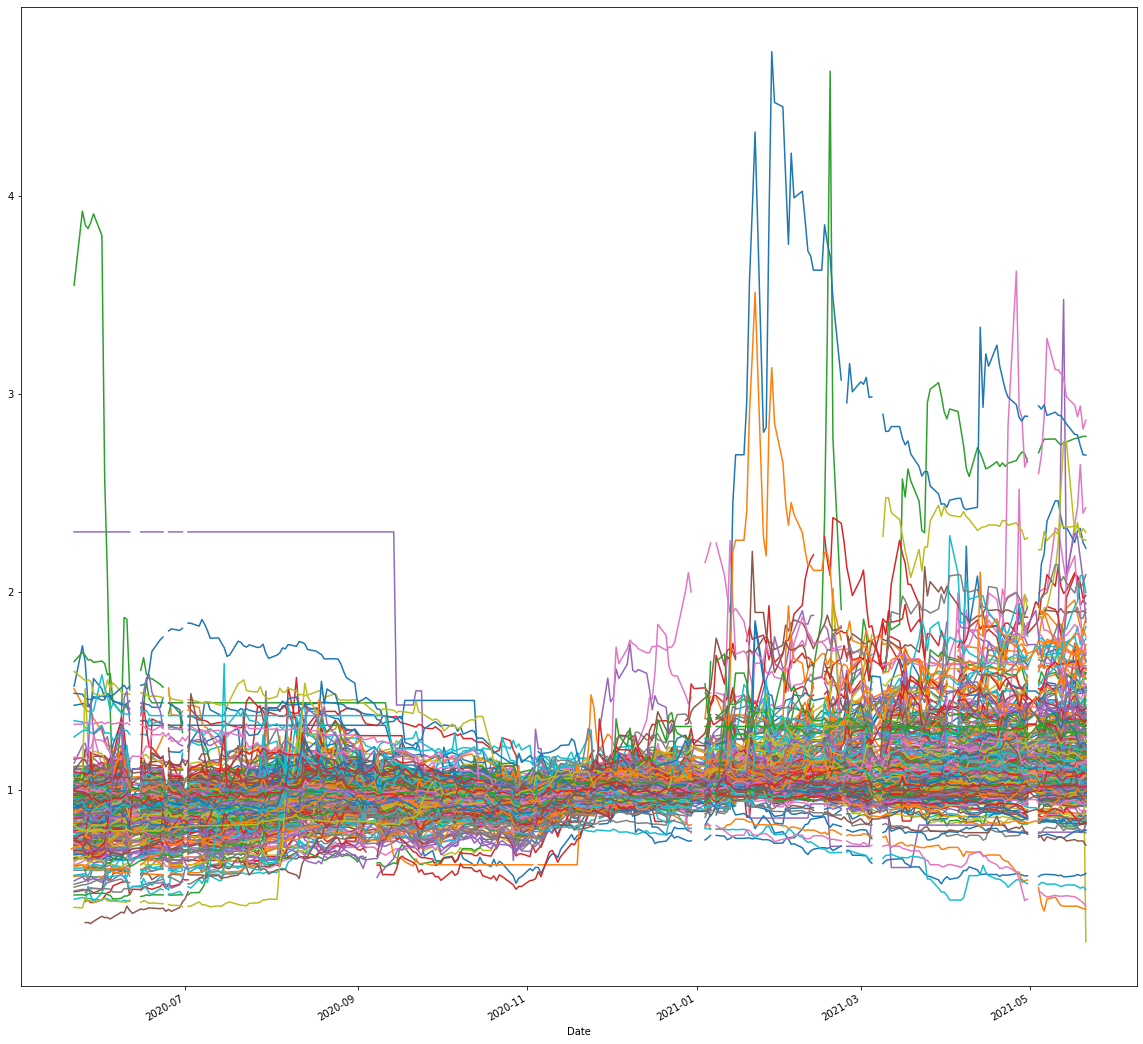

In [225]:
# norm_col = gr_.max() < 50
gr_.loc[:, norm_col].plot(legend = False, figsize=(20, 20))

In [226]:
gr.loc[gr_.index == '2021-05-21']

,AAL,AAPL,ABBV,ABRD.ME,ABT,ACKO.ME,ADBE,AFKS.ME,AFLT.ME,AGRO.ME,AKRN.ME,ALBK.ME,ALNU.ME,ALRS.ME,AMAT,AMD,AMEZ.ME,AMGN,AMZN,ANTM,APA,APTK.ME,AQUA.ME,ARSA.ME,ASSB.ME,ATVI,AVAN.ME,AVGO,BA,BABA,BANE.ME,BANEP.ME,BELU.ME,BIDU,BIIB,...,UPRO.ME,UPS,URKZ.ME,USBN.ME,UTAR.ME,UWGN.ME,V,VGSB.ME,VGSBP.ME,VJGZ.ME,VJGZP.ME,VLHZ.ME,VNT,VRSB.ME,VRSBP.ME,VRTX,VSMO.ME,VSYD.ME,VSYDP.ME,VTBR.ME,VTRS,VZ,VZRZP.ME,WMT,WTCM.ME,WTCMP.ME,XOM,YAKG.ME,YKEN.ME,YKENP.ME,YNDX.ME,YRSB.ME,YRSBP.ME,ZILL.ME,ZVEZ.ME
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-21,1.491738,1.042421,1.193002,0.965199,1.087968,1.091954,1.030901,1.141143,1.021978,1.149233,1.011667,1.12069,1.143357,1.327065,1.68019,0.943398,2.426263,1.068523,1.012134,1.331956,1.417506,1.00738,1.211618,1.586387,1.52,1.152794,1.22155,1.196468,1.160178,0.831862,0.913834,0.936495,2.786645,1.324829,1.03984,...,1.08332,1.320306,1.087654,1.219158,1.023088,0.411668,1.103603,0.946684,1.024,2.691958,1.689373,1.292683,1.081479,1.002967,0.963636,0.930465,1.368421,1.133995,1.107843,1.226059,0.962471,0.99995,0.836592,1.022261,1.139754,1.137682,1.419689,2.30149,1.087291,0.983517,0.997527,1.27907,1.016667,1.395793,0.968678


<AxesSubplot:xlabel='Date'>

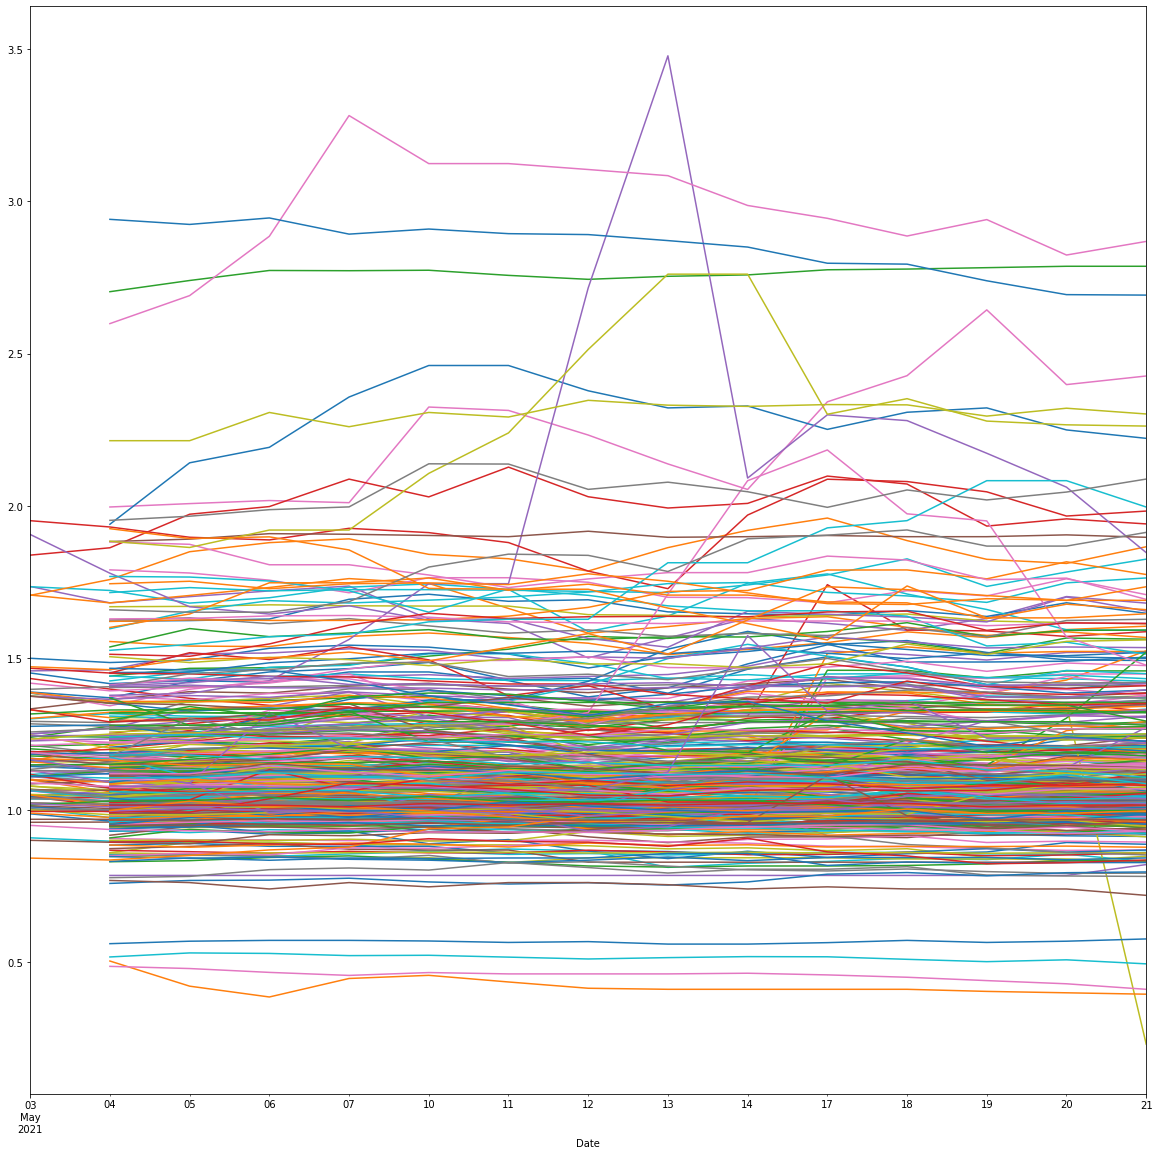

In [227]:
gr_.loc[gr_.index > '2021-05-01', gr_.max() < 50].plot(legend = False, figsize=(20, 20))

In [42]:
# Параметры
np.unique(data.columns.to_frame()[0].values)

array(['Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits',
       'Volume'], dtype=object)